# Notebook Skill Gap Module Career Path Navigator API


Projek akan diintegrasikan dengan modul lain untuk pemenuhan capstone project dicoding path data science. Capaian projek ialah membuat career path navigator.

# Import Library

In [41]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
# Library Machine Learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter

Load Dataset

In [42]:
df = pd.read_csv("../anang/export/final_data.csv", delimiter=",")
df.head()

,id,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,...,company_industry,job_description,salary,job_description_cleaned,annotations,skills,career_level_norm,experience_years,experience_bucket,education_level_norm
0,10,Tax Supervisor,Banten,IDR,Supervisor/Koordinator,3 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Akuntansi / Keuangan,Audit & Pajak","Tip;Asuransi kesehatan;Waktu regular, Senin - ...",...,Konstruksi/Bangunan/Teknik,ResponsibilitiesPrepare corporate income tax (...,8000000.0,responsibilitiesprepare corporate income tax c...,{'text': 'responsibilitiesprepare corporate in...,"['income tax', 'tax compliance', 'digital elec...",Supervisor,3,Middle,S1
1,27,MARKETING COMMUNICATION & CHANNEL MANAGER,Jakarta Pusat,IDR,Manajer/Asisten Manajer,2 tahun,Tidak terspesifikasi,Penuh Waktu,"Penjualan / Pemasaran,Pemasaran/Pengembangan B...",Asuransi Gigi;Asuransi kesehatan;Parkir;Waktu ...,...,"Konsultasi (IT, Ilmu Pengetahuan, Teknis & Tek...","SCOPE OF ROLE :To plan, develop, implement and...",15000000.0,scope of role to plan develop implement and me...,{'text': 'scope of role to plan develop implem...,"['marketing communication', 'strategic communi...",Manajer,2,Middle,Unknown
2,32,PPIC,Tangerang,IDR,Manajer/Asisten Manajer,5 tahun,Sarjana (S1),Penuh Waktu,"Manufaktur,Manufaktur","Asuransi kesehatan;Waktu regular, Senin - Juma...",...,Manufaktur/Produksi,Tanggung Jawab:Membuat perencanaan produksi be...,6600000.0,tanggung jawab membuat perencanaan produksi be...,{'text': 'tanggung jawab membuat perencanaan p...,"['warehouse management', 'inventory control', ...",Manajer,5,Senior,S1
3,35,C# Advanced/Senior Developer,Jakarta Timur,IDR,Supervisor/Koordinator,2 tahun,"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",Penuh Waktu,"Komputer/Teknologi Informasi,IT-Perangkat Lunak","Tip;Asuransi kesehatan;Waktu regular, Senin - ...",...,Komputer/Teknik Informatika (Perangkat Lunak),Kualifikasi:Kandidat harus memiliki setidaknya...,9500000.0,kualifikasi kandidat harus memiliki setidaknya...,{'text': 'kualifikasi kandidat harus memiliki ...,"['asp net', 'object orient programming', 'c', ...",Supervisor,2,Middle,S1
4,38,IT Software Developer Staff,Jakarta Barat,IDR,Pegawai (non-manajemen & non-supervisor),1 tahun,"Sarjana (S1), Diploma Pascasarjana, Gelar Prof...",Penuh Waktu,"Komputer/Teknologi Informasi,IT-Perangkat Lunak",Kasual (contoh: Kaos);Senin - Jum'at (HO) Seni...,...,Industri Berat/Mesin/Peralatan,Bachelor’s degree of Information Technology or...,6800000.0,bachelor’s degree of information technology or...,{'text': 'bachelor’s degree of information tec...,"['information technology', 'restful api', 'spr...",Staff,1,Entry,S2


Mapping Job Function dan ganti value dengan hasil mapping

In [43]:
job_function_mapping = {
        # Finance & Accounting
        "Akuntansi / Keuangan,Audit & Pajak": "Finance & Accounting",
        "Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan": "Finance & Accounting",
        "Akuntansi / Keuangan,Perbankan / Jasa Finansial ": "Finance & Accounting",
        "Akuntansi / Keuangan,Keuangan / Investasi Perusahaan ": "Finance & Accounting",
        "Sains,Aktuaria/Statistik": "Finance & Accounting",

        # IT & Software
        "Komputer/Teknologi Informasi,IT-Perangkat Lunak": "IT & Software",
        "Komputer/Teknologi Informasi,IT-Admin Jaringan/Sistem/Database": "IT & Software",
        "Komputer/Teknologi Informasi,IT-Perangkat Keras": "IT & Software",

        # Engineering (Non-IT)
        "Teknik,Teknik Lingkungan": "Engineering",
        "Teknik,Teknik Lainnya": "Engineering",
        "Teknik,Mekanikal": "Engineering",
        "Teknik,Teknik Elektronika": "Engineering",
        "Teknik,Teknik Elektro": "Engineering",
        "Teknik,Teknik Industri": "Engineering",
        "Teknik,Teknik Kimia": "Engineering",
        "Bangunan/Konstruksi,Teknik Sipil/Konstruksi Bangunan": "Engineering",
        "Bangunan/Konstruksi,Survei Kuantitas": "Engineering",

        # Manufacturing & Operations
        "Manufaktur,Manufaktur": "Manufacturing & Operations",
        "Manufaktur,Pemeliharaan": "Manufacturing & Operations",
        "Manufaktur,Pembelian/Manajemen Material": "Manufacturing & Operations",
        "Manufaktur,Penjaminan Kualitas / QA": "Manufacturing & Operations",
        "Pelayanan,Logistik/Rantai Pasokan": "Manufacturing & Operations",

        # Sales & Marketing
        "Penjualan / Pemasaran,Pemasaran/Pengembangan Bisnis": "Sales & Marketing",
        "Penjualan / Pemasaran,Digital Marketing": "Sales & Marketing",
        "Penjualan / Pemasaran,Penjualan - Jasa Keuangan": "Sales & Marketing",
        "Penjualan / Pemasaran,Penjualan - Teknik/Teknikal/IT": "Sales & Marketing",
        "Penjualan / Pemasaran,Penjualan Ritel": "Sales & Marketing",
        "Penjualan / Pemasaran,Merchandising": "Sales & Marketing",
        "Penjualan / Pemasaran,Penjualan - Korporasi": "Sales & Marketing",
        "Penjualan / Pemasaran,Telesales/Telemarketing": "Sales & Marketing",
        "Penjualan / Pemasaran,E-commerce": "Sales & Marketing",
        "Seni/Media/Komunikasi,Periklanan": "Sales & Marketing",

        # HR & Administration
        "Sumber Daya Manusia/Personalia,Sumber Daya Manusia / HR": "HR & Administration",
        "Sumber Daya Manusia/Personalia,Staf / Administrasi umum": "HR & Administration",
        "Sumber Daya Manusia/Personalia,Sekretaris": "HR & Administration",
        "Sumber Daya Manusia/Personalia,Top Management / Manajemen Tingkat Atas": "HR & Administration",

        # Creative & Media
        "Seni/Media/Komunikasi,Seni / Desain Kreatif": "Creative & Media",
        "Seni/Media/Komunikasi,Hubungan Masyarakat": "Creative & Media",
        "Seni/Media/Komunikasi,Hiburan": "Creative & Media",
        "Lainnya,Jurnalis/Editor": "Creative & Media",

        # Healthcare & Life Sciences
        "Layanan Kesehatan,Diagnosa/Lainnya": "Healthcare",
        "Layanan Kesehatan,Farmasi": "Healthcare",
        "Layanan Kesehatan,Praktisi/Asisten Medis": "Healthcare",
        "Sains,Bioteknologi": "Healthcare",
        "Sains,Biomedis": "Healthcare",
        "Sains,Kimia": "Healthcare",
        "Sains,Geologi/Geofisika": "Healthcare",

        # Education & Training
        "Pendidikan/Pelatihan,Pendidikan": "Education",
        "Pendidikan/Pelatihan,Pelatihan & Pengembangan": "Education",

        # Hospitality & Service
        "Hotel/Restoran,Makanan/Minuman/Pelayanan Restoran": "Hospitality & Service",
        "Hotel/Restoran,Hotel/Pariwisata": "Hospitality & Service",
        "Pelayanan,Layanan Pelanggan": "Hospitality & Service",
        "Pelayanan,Teknikal & Bantuan Pelanggan": "Hospitality & Service",
        "Pelayanan,Perawatan Pribadi": "Hospitality & Service",

        # Legal & Public Service
        "Pelayanan,Pengacara / Asisten Legal": "Legal & Public Service",
        "Pelayanan,Angkatan Bersenjata": "Legal & Public Service",

        # Science & Agriculture
        "Sains,Pertanian": "Science & Agriculture",
        "Sains,Teknologi Makanan/Ahli Gizi": "Science & Agriculture",
        "Sains,Sains & Teknologi": "Science & Agriculture",

        # Other
        "Bangunan/Konstruksi,Arsitek/Desain Interior": "Other",
        "Bangunan/Konstruksi,Properti/Real Estate": "Other",
        "Lainnya,Pekerjaan Umum": "Other",
        "Lainnya,Lainnya/Kategori tidak tersedia": "Other",
    }
# ganti value asli dengan hasil mapping
df["job_function_group"] = (
    df["job_function"]
    .map(job_function_mapping)
    .fillna("Other")
)

Drop data yang tidak punya skill

In [44]:
df = df.dropna(subset=['skills', 'job_function_group'])

# Training Model RF & TF-IDF

Dalam proyek ini, Random Forest dipilih sebagai model dasar (baseline) karena karakteristiknya yang sangat cocok dengan data teks berdimensi tinggi (TF-IDF). Berikut adalah pertimbangan utamanya:

1. Ketangguhan terhadap Dimensi Tinggi (High Dimensionality): Data hasil vektorisasi TF-IDF menghasilkan ribuan fitur (kata/n-gram). Random Forest bekerja dengan memilih subset fitur secara acak pada setiap pemecahan node (split), sehingga sangat efisien dalam menangani data sparse tanpa terjebak Curse of Dimensionality seburuk algoritma jarak (seperti KNN).

2. Interpretabilitas (Feature Importance): Salah satu tujuan utama proyek ini adalah Skill Gap Analysis. Random Forest menyediakan metrik feature_importances_ bawaan yang mengukur penurunan Gini Impurity. Ini memungkinkan kita untuk mengekstrak kata kunci paling berpengaruh dari setiap kategori pekerjaan secara transparan.

3. Resistensi terhadap Overfitting: Berbeda dengan Decision Tree tunggal yang mudah menghafal data (overfitting), Random Forest menggunakan prinsip Bagging (Bootstrap Aggregating). Dengan merata-ratakan prediksi dari ratusan pohon, varians model berkurang, menghasilkan prediksi yang lebih stabil pada data uji yang belum pernah dilihat.

**Training Model**

In [45]:
# tf-idf dengan pendekatan N-Gram
tfidf = TfidfVectorizer(
    max_features=2000,           
    stop_words='english',        
    ngram_range=(1, 3),          # Tangkap frasa sampai 3 kata
    min_df=5,                    
    max_df=0.7                   
)
# X merupakan skills, y merupakan job function
X = tfidf.fit_transform(df['skills'])
y = df['job_function_group']
# mendapatkan fitur
feature_names = np.array(tfidf.get_feature_names_out())
#Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# inisiasi training dengan random forest
rf = RandomForestClassifier(
    n_estimators=100, 
    random_state=42, 
    n_jobs=1,
    class_weight='balanced' # job function sales dan marketing imbalance, maka ditambahkan balanced agar model balancing
)
rf.fit(X_train, y_train)
# Cek Akurasi
acc = rf.score(X_test, y_test)
print(f"Akurasi Test Set: {acc:.2%}")

Akurasi Test Set: 80.51%


**Evaluasi Model**

Laporan Metrics Untuk Setiap Job Function
                            precision    recall  f1-score   support

          Creative & Media       0.55      0.50      0.52        24
                 Education       1.00      0.67      0.80         6
               Engineering       0.69      0.67      0.68        27
      Finance & Accounting       0.90      0.87      0.89        62
       HR & Administration       0.83      0.61      0.70        31
                Healthcare       1.00      0.17      0.29         6
     Hospitality & Service       0.78      0.47      0.58        15
             IT & Software       0.92      0.90      0.91       122
    Legal & Public Service       0.00      0.00      0.00         1
Manufacturing & Operations       0.76      0.64      0.69        44
                     Other       0.50      0.31      0.38        16
         Sales & Marketing       0.79      0.93      0.85       230
     Science & Agriculture       0.00      0.00      0.00         1

    

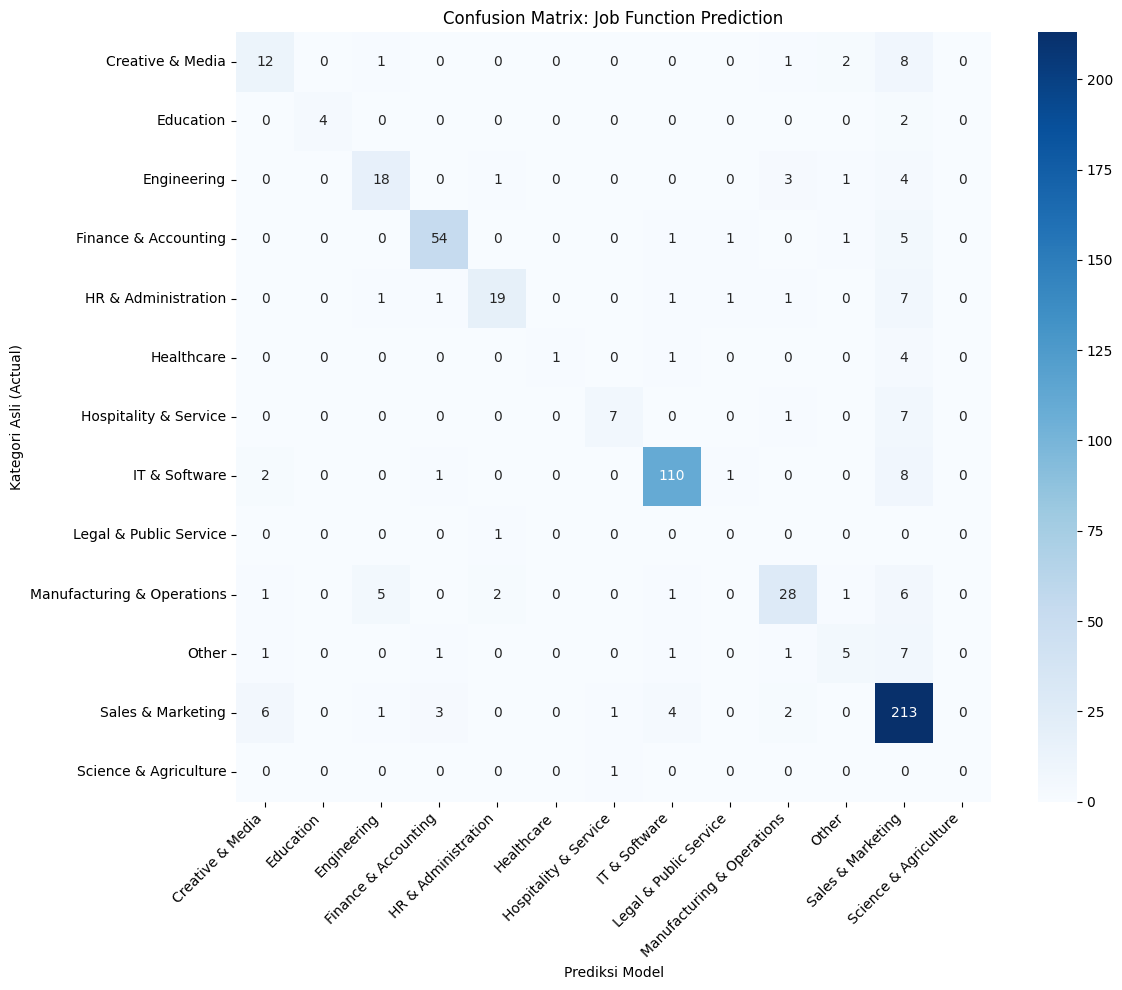

In [46]:
#Prediksi pada Test Set
y_pred = rf.predict(X_test)

# Tampilkan metrics untuk setiap kategori pekerjaan
print(f"Laporan Metrics Untuk Setiap Job Function")

# zero_division=0 agar tidak error jika ada kategori yang datanya kosong
report = classification_report(y_test, y_pred, zero_division=0)
print(report)
      
# Visualisasi Confusion Matrix
print(f"Confusion Matrix Heatmap")
# Buat Matrix
cm = confusion_matrix(y_test, y_pred)
labels = rf.classes_ # Mengambil nama kategori otomatis dari model

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Prediksi Model')
plt.ylabel('Kategori Asli (Actual)')
plt.title('Confusion Matrix: Job Function Prediction')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Terjadi Class Imbalance**

1. Mengapa Terjadi Ketimpangan?
* Mayoritas: Lowongan Sales dan IT memang mendominasi pasar kerja
* Minoritas: Lowongan Legal atau Agriculture jarang muncul

2. "Weighted Average" vs "Macro Average"
* Weighted Average memberikan bobot lebih pada kelas mayoritas (Sales/IT), maka skornya bisa tinggi (0,81%)
* Macro Average menganggap semua kelas sama pentingnya, maka skornya rendah karena terjadi ketimpangan (0,52%)

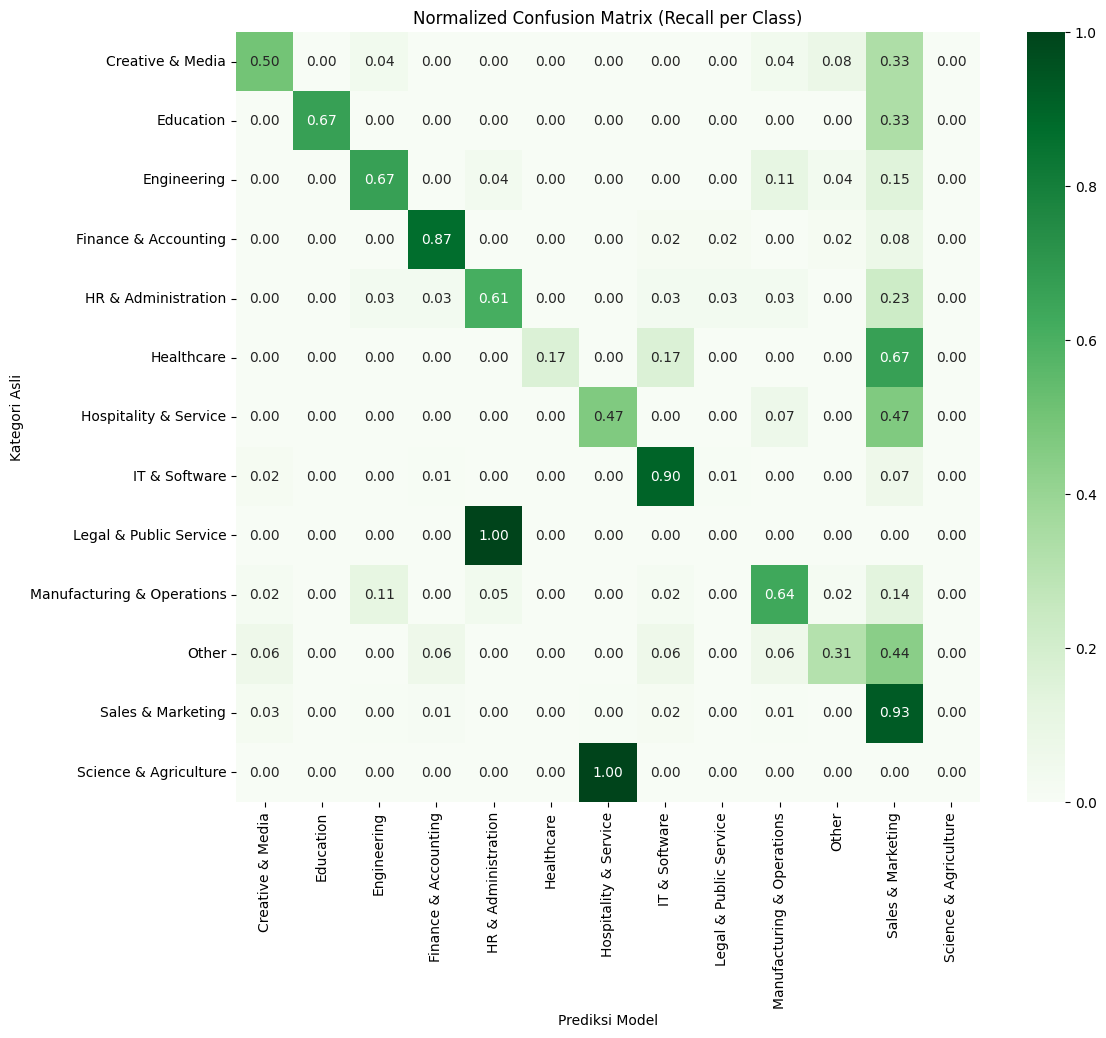

In [47]:
# Hitung Confusion Matrix dengan Normalisasi
# normalize='true' artinya mengubah angka jadi persentase per baris (Recall)
cm_norm = confusion_matrix(y_test, y_pred, normalize='true') 

plt.figure(figsize=(12, 10))
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Greens', 
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Prediksi Model')
plt.ylabel('Kategori Asli')
plt.title('Normalized Confusion Matrix (Recall per Class)')
plt.show()

* **Imbalance class**  masih terjadi meskipun model telah menerapkan balancing. Terlihat pada prediksi di confusion matrix, job function dengan skor recall tinggi hanya pada sales & marketing, IT & software, dan finance & accounting. 
* **Imbalance class**  bisa diatasi dengan Resampling (SMOTE), Regrouping, dan Ganti Algoritma seperti XGBoost dan LightGBM yang dapat menangani imbalance lebih baik

Dengan konsiderasi bahwa f1 score sudah baik (0,81%), maka digunakan regrouping untuk mengumpulkan data yang sedikit sampelnya ke satu kelas agar model tidak bingung dan confusion matrix menjadi lebih baik.

# Cleaning Data dan Regroup Job Function

**Tentukan Outlier untuk Batas Ambang (Treshold) Regrouping pada kolom Skills**

                                              skills  skill_length
0  ['income tax', 'tax compliance', 'digital elec...           289
1  ['marketing communication', 'strategic communi...           250
2  ['warehouse management', 'inventory control', ...           125
3  ['asp net', 'object orient programming', 'c', ...            56
4  ['information technology', 'restful api', 'spr...           172
------------------------------------------------------------
📊 STATISTIK IQR:
   - Q1 (25% data)    : 85.00 karakter
   - Q3 (75% data)    : 290.00 karakter
   - IQR              : 205.00
------------------------------
🎯 BATAS ILMIAH OUTLIER:
   - Batas Bawah      : < 0.00 karakter
   - Batas Atas       : > 597.50 karakter
------------------------------------------------------------
Hasil filtering:
   - Data Awal        : 2921
   - Outlier Dibuang  : 93 (3.18%)
   - Data Bersih      : 2828


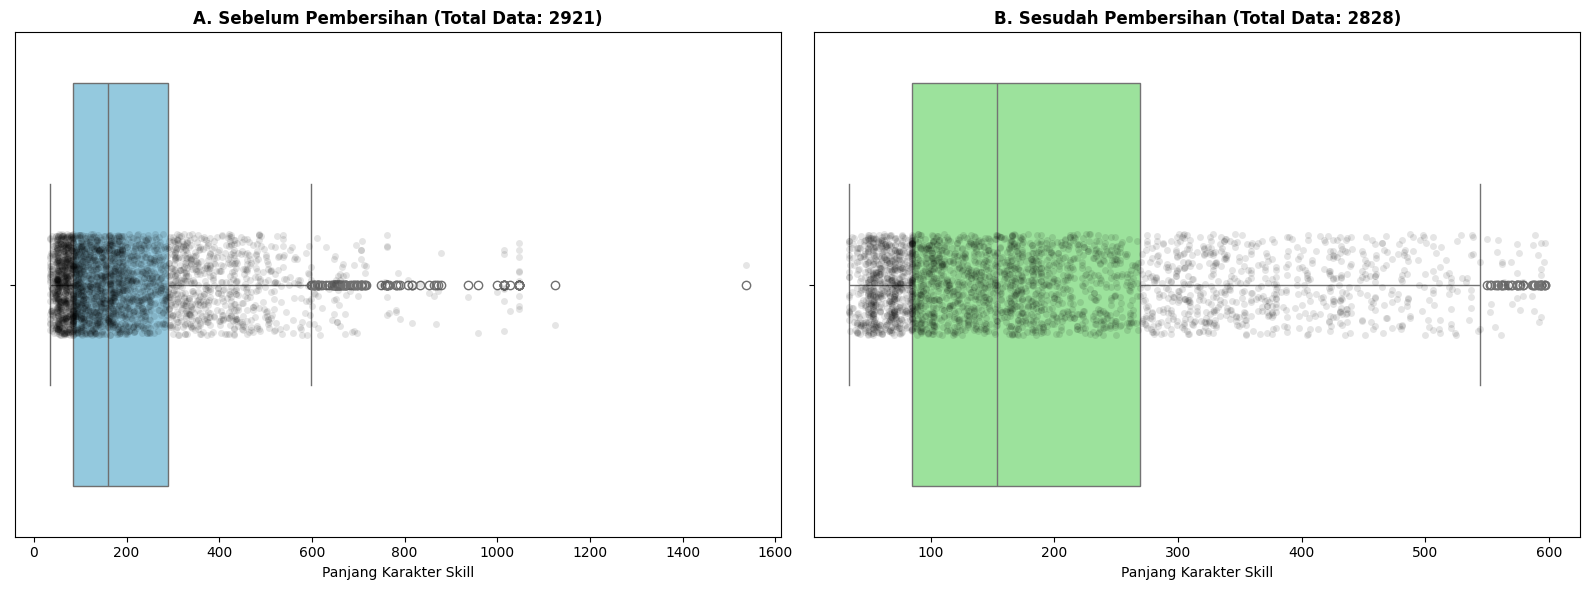


 contoh yang melebihi batas atas: 
                                   job_title  skill_length  \
1542                      Head IT Department          1536   
2507  Marketing Specialist - Digital Content          1124   
779                E-commerce Mandarin(中文运营)          1047   

                                                 skills  
1542  ['information technology', 'network security',...  
2507  ['marketing mix', 'performance metric', 'custo...  
779   ['digital marketing', 'target market', 'graphi...  

 contoh yang melebihi batas bawah:
                                     job_title  skill_length  \
2073              BUSINESS DEVELOPMENT MANAGER           598   
1615         Lead Software Engineer (4+ years)           600   
1669  ERP Consultant / Implementer (Bali Area)           604   

                                                 skills  
2073  ['market research', 'target market', 'business...  
1615  ['test first', 'software engineering', 'softwa...  
1669  ['quality 

In [48]:
#drop NaN di kolom 'skills' 
df = df.dropna(subset=['skills']).copy()

# Hitung panjang karakter dari setiap teks skill
df['skill_length'] = df['skills'].astype(str).str.len()

# print contoh skills dan skills lengthnya
print(df[['skills', 'skill_length']].head())
print("-" * 60)


# Visualisasi boxplot sebelum outlier
# Siapkan area plotting 2 kolom (Kiri: Sebelum, Kanan: Sesudah)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Kiri (Data Mentah)
sns.boxplot(x=df['skill_length'], ax=axes[0], color='skyblue')
axes[0].set_title(f'A. Sebelum Pembersihan (Total Data: {len(df)})', fontweight='bold')
axes[0].set_xlabel('Panjang Karakter Skill')
# Tambahkan sedikit jitter (titik-titik) agar sebaran data terlihat
sns.stripplot(x=df['skill_length'], ax=axes[0], color='black', alpha=0.1, jitter=True)

# Perhitungan metode IQR untuk data outlier
Q1 = df['skill_length'].quantile(0.25)
Q3 = df['skill_length'].quantile(0.75)

# Interquartile Range 
IQR = Q3 - Q1

# Menentukan Batas
# Batas bawah kita kunci di 0, karena panjang karakter tidak mungkin negatif
lower_bound = max(0, Q1 - (1.5 * IQR)) 
upper_bound = Q3 + (1.5 * IQR)

print("📊 STATISTIK IQR:")
print(f"   - Q1 (25% data)    : {Q1:.2f} karakter")
print(f"   - Q3 (75% data)    : {Q3:.2f} karakter")
print(f"   - IQR              : {IQR:.2f}")
print("-" * 30)
print(f"🎯 BATAS ILMIAH OUTLIER:")
print(f"   - Batas Bawah      : < {lower_bound:.2f} karakter")
print(f"   - Batas Atas       : > {upper_bound:.2f} karakter")
print("-" * 60)

# Filter data
# Identifikasi data outlier
outliers = df[(df['skill_length'] < lower_bound) | (df['skill_length'] > upper_bound)]

# Buat dataframe baru yang bersih (Hanya data di dalam batas)
df_clean = df[(df['skill_length'] >= lower_bound) & (df['skill_length'] <= upper_bound)].copy()

#tunjukan hasil filtering
print(f"Hasil filtering:")
print(f"   - Data Awal        : {len(df)}")
print(f"   - Outlier Dibuang  : {len(outliers)} ({len(outliers)/len(df):.2%})")
print(f"   - Data Bersih      : {len(df_clean)}")


# Visualisasi data setelah outlier
# Plot Kanan (Data Bersih)
sns.boxplot(x=df_clean['skill_length'], ax=axes[1], color='lightgreen')
axes[1].set_title(f'B. Sesudah Pembersihan (Total Data: {len(df_clean)})', fontweight='bold')
axes[1].set_xlabel('Panjang Karakter Skill')
# Tambahkan jitter
sns.stripplot(x=df_clean['skill_length'], ax=axes[1], color='black', alpha=0.1, jitter=True)

plt.tight_layout()
plt.show()

# cek outlier yang dibuang
if len(outliers) > 0:
    print("\n contoh yang melebihi batas atas: ")
    print(outliers.sort_values('skill_length', ascending=False)[['job_title', 'skill_length', 'skills']].head(3))
    print("\n contoh yang melebihi batas bawah:")
    print(outliers.sort_values('skill_length', ascending=True)[['job_title', 'skill_length', 'skills']].head(3))

**Cek & Visualisasi Jumlah Data Per Group**

Total Jumlah Kategori Awal: 13
Detail Jumlah Data per Kategori:
--------------------------------------------------
Kategori                                 | Jumlah     | Persentase
--------------------------------------------------
Sales & Marketing                        | 1012       | 35.79%
IT & Software                            | 547        | 19.34%
Finance & Accounting                     | 281        | 9.94%
Manufacturing & Operations               | 240        | 8.49%
HR & Administration                      | 194        | 6.86%
Engineering                              | 146        | 5.16%
Creative & Media                         | 131        | 4.63%
Hospitality & Service                    | 80         | 2.83%
Other                                    | 73         | 2.58%
Education                                | 64         | 2.26%
Healthcare                               | 29         | 1.03%
Legal & Public Service                   | 18         | 0.64%
Science & Agriculture

C:\Users\ACER\AppData\Local\Temp\ipykernel_8832\776298472.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_counts.values, y=group_counts.index, palette="viridis")


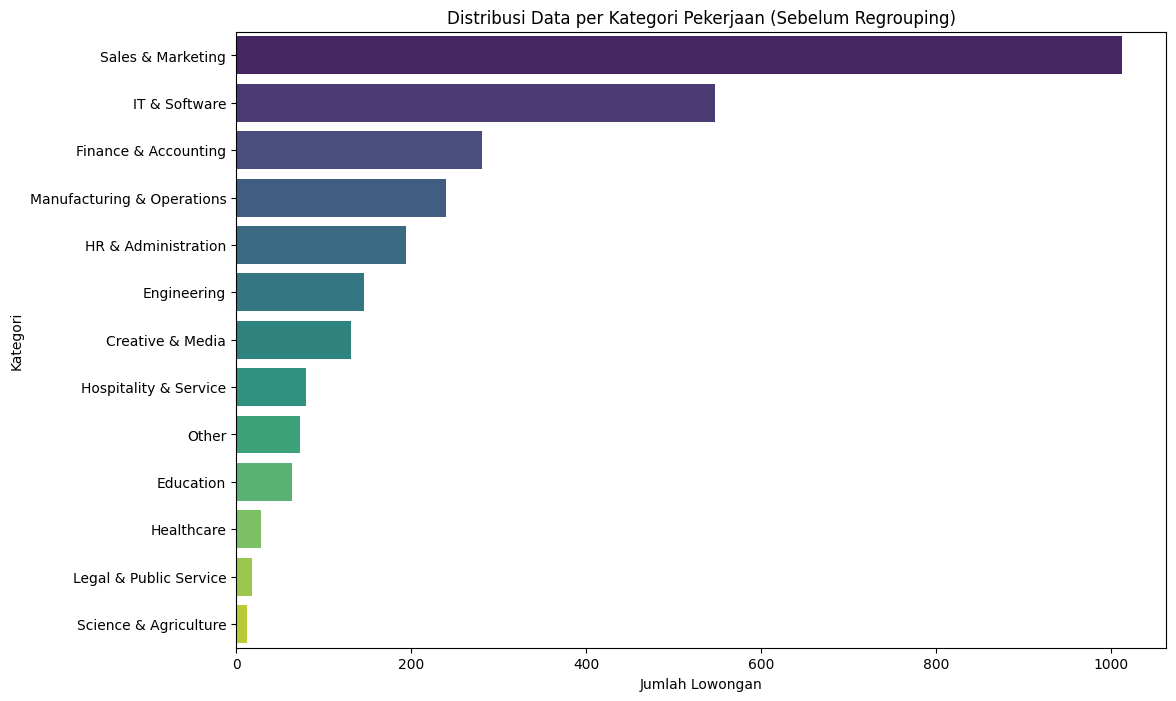

In [49]:
#Hitung Jumlah Data per Kategori
group_counts = df_clean['job_function_group'].value_counts()

#Tampilkan Angka Detail
print(f"Total Jumlah Kategori Awal: {len(group_counts)}")
print("Detail Jumlah Data per Kategori:")
print("-" * 50)
print(f"{'Kategori':<40} | {'Jumlah':<10} | {'Persentase':<10}")
print("-" * 50)

total_data = len(df_clean)
for category, count in group_counts.items():
    percent = (count / total_data) * 100
    print(f"{category:<40} | {count:<10} | {percent:.2f}%")

#Visualisasi Bar Chart (Agar ketimpangan terlihat jelas)
plt.figure(figsize=(12, 8))
sns.barplot(x=group_counts.values, y=group_counts.index, palette="viridis")
plt.title('Distribusi Data per Kategori Pekerjaan (Sebelum Regrouping)')
plt.xlabel('Jumlah Lowongan')
plt.ylabel('Kategori')
plt.show()

**Proses Regrouping**

In [50]:
# 1. Tentukan Threshold (Batas Minimal Data)
THRESHOLD = 100  

# Identifikasi Kategori Kecil
small_cats = group_counts[group_counts < THRESHOLD].index.tolist()

if len(small_cats) > 0:
    print(f"Ditemukan {len(small_cats)} kategori dengan jumlah data < {THRESHOLD}.")
    print(f"   Mereka akan digabungkan menjadi kategori 'Other'.")
    print(f"   List Kategori: {small_cats}")
    
    # 3. Lakukan Penggantian (Regrouping)
    # Jika kategori ada di list small_cats, ubah jadi 'Other', jika tidak biarkan.
    df_clean['job_function_group'] = df_clean['job_function_group'].apply(
        lambda x: 'Other' if x in small_cats else x
    )
else:
    print("\n✅ Tidak ada kategori di bawah threshold. Data tetap.")

Ditemukan 6 kategori dengan jumlah data < 100.
   Mereka akan digabungkan menjadi kategori 'Other'.
   List Kategori: ['Hospitality & Service', 'Other', 'Education', 'Healthcare', 'Legal & Public Service', 'Science & Agriculture']


**Analisis Setelah Regrouping**

Total Jumlah Kategori Sekarang: 8
--------------------------------------------------
Kategori                                 | Jumlah     | Persentase
--------------------------------------------------
Sales & Marketing                        | 1012       | 35.79%
IT & Software                            | 547        | 19.34%
Finance & Accounting                     | 281        | 9.94%
Other                                    | 277        | 9.79%
Manufacturing & Operations               | 240        | 8.49%
HR & Administration                      | 194        | 6.86%
Engineering                              | 146        | 5.16%
Creative & Media                         | 131        | 4.63%


C:\Users\ACER\AppData\Local\Temp\ipykernel_8832\3158674300.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=new_counts.values, y=new_counts.index, palette="magma")


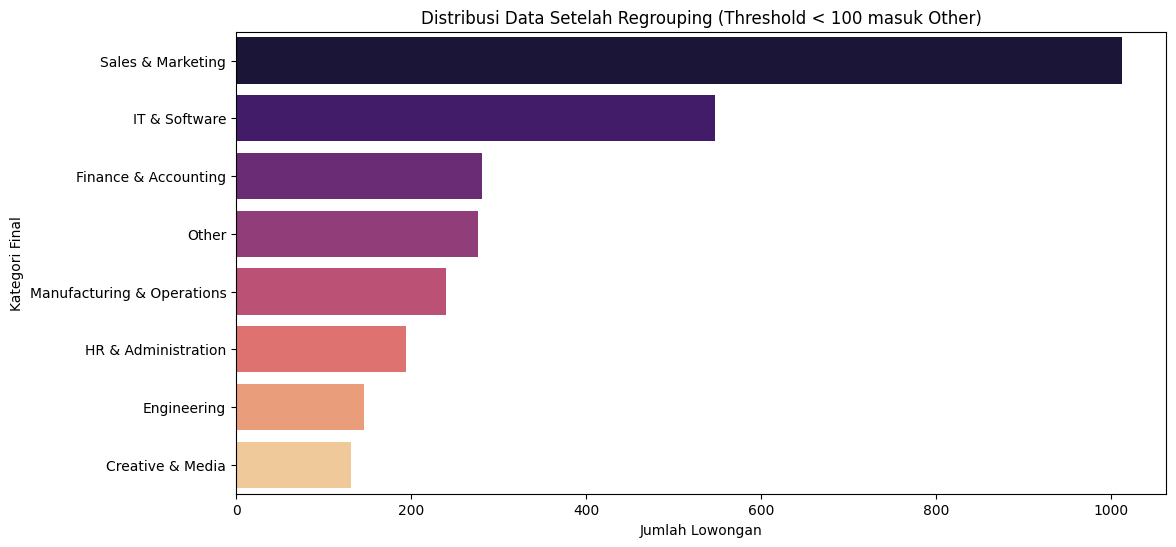

In [51]:
# Hitung Ulang Jumlah Data
new_counts = df_clean['job_function_group'].value_counts()

# Tampilkan Angka Detail Baru
print(f"Total Jumlah Kategori Sekarang: {len(new_counts)}")
print("-" * 50)
print(f"{'Kategori':<40} | {'Jumlah':<10} | {'Persentase':<10}")
print("-" * 50)

for category, count in new_counts.items():
    percent = (count / total_data) * 100
    print(f"{category:<40} | {count:<10} | {percent:.2f}%")

# Visualisasi Bar Chart
plt.figure(figsize=(12, 6)) # penyusutan ukuran bar
# Buat chartnya
sns.barplot(x=new_counts.values, y=new_counts.index, palette="magma")
plt.title(f'Distribusi Data Setelah Regrouping (Threshold < {THRESHOLD} masuk Other)')
plt.xlabel('Jumlah Lowongan')
plt.ylabel('Kategori Final')
plt.show()

Job Function Hospitality & Service', 'Other', 'Education', 'Healthcare', 'Legal & Public Service', 'Science & Agriculture' dioper ke 'Other'

# Re-Training TF-IDF dan RF Model

In [52]:
# Inisiasi ulang model tf-idf
tfidf = TfidfVectorizer(
    max_features=2500,           # menaikkan sedikit fitur karena data lebih bersih
    stop_words='english',        
    ngram_range=(1, 3),          # Tangkap frasa yang lebih umum dan logis
    min_df=5,                    # Hapus typo unik
    max_df=0.8                   # Hapus kata terlalu umum
)

# X = Skills, y = Job Function Group (Target Baru)
X = tfidf.fit_transform(df_clean['skills'])
y = df_clean['job_function_group']

# masukkan array tf-idf ke feature_names
feature_names = np.array(tfidf.get_feature_names_out())

#Split dan Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# class_weight='balanced' tetap kita pakai sebagai pengaman ekstra
rf = RandomForestClassifier(
    n_estimators=100, 
    random_state=42, 
    n_jobs=1, 
    class_weight='balanced'
) 

rf.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

**Evaluasi Model Baru**

Evaluasi Model Baru
                            precision    recall  f1-score   support

          Creative & Media       0.73      0.62      0.67        26
               Engineering       0.54      0.52      0.53        29
      Finance & Accounting       0.81      0.89      0.85        56
       HR & Administration       0.69      0.56      0.62        39
             IT & Software       0.92      0.90      0.91       110
Manufacturing & Operations       0.69      0.56      0.62        48
                     Other       0.66      0.56      0.61        55
         Sales & Marketing       0.83      0.94      0.88       203

                  accuracy                           0.80       566
                 macro avg       0.73      0.69      0.71       566
              weighted avg       0.79      0.80      0.79       566



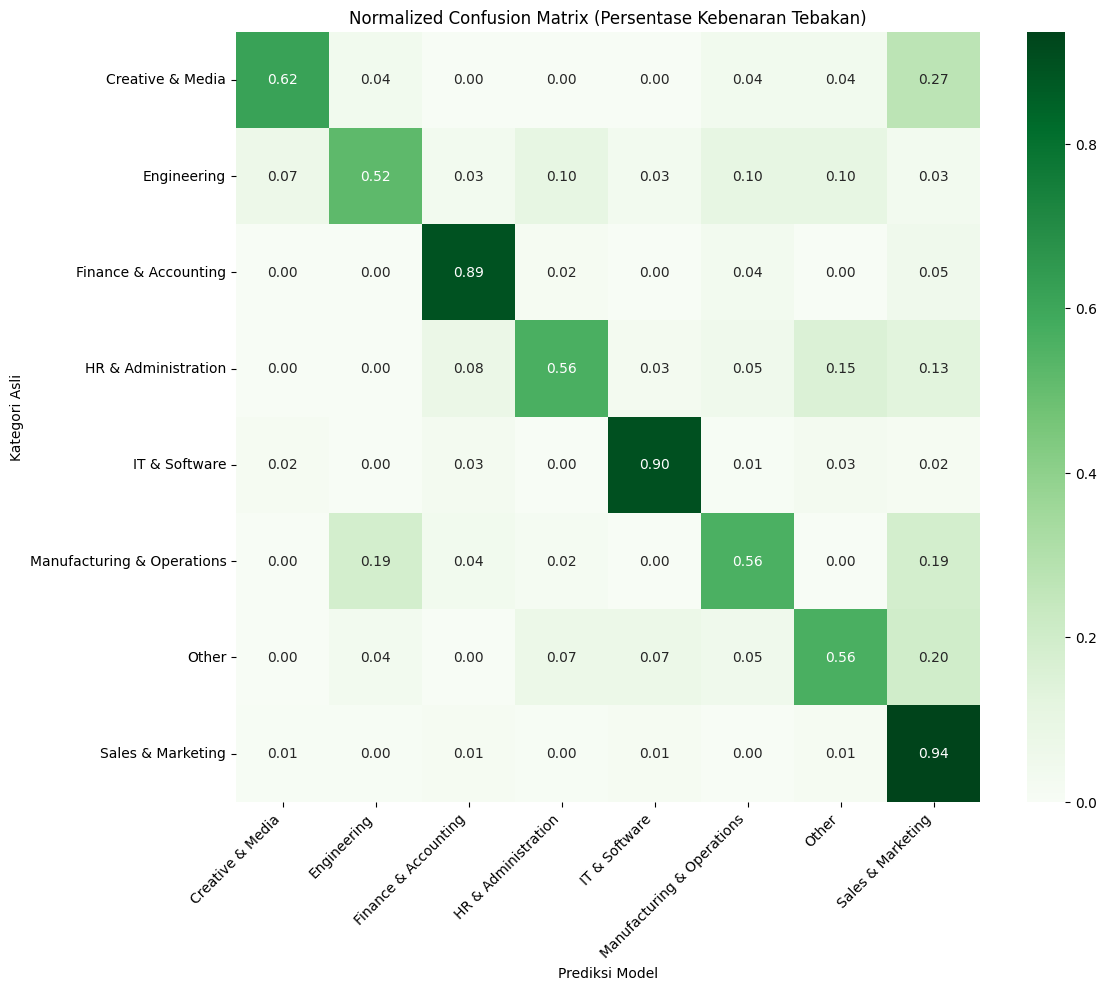

In [53]:
print("Evaluasi Model Baru")
y_pred = rf.predict(X_test)

# Report Text
print(classification_report(y_test, y_pred, zero_division=0))

# Normalisasi Confusion Matrix
# Buat dalam persen recall
cm_norm = confusion_matrix(y_test, y_pred, normalize='true')
labels = rf.classes_

#Buat confusion matrix normalisasi
plt.figure(figsize=(12, 10))
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Greens', 
            xticklabels=labels, yticklabels=labels)
plt.title('Normalized Confusion Matrix (Persentase Kebenaran Tebakan)')
plt.xlabel('Prediksi Model')
plt.ylabel('Kategori Asli')
plt.xticks(rotation=45, ha='right')
plt.show()


**Terjadi Trade-off**
* Sebelumnya (0.81): Model "bermain aman". Karena data Sales/IT sangat banyak, model cenderung menebak Sales/IT terus-menerus. Akurasinya tinggi karena tebakannya kebetulan benar (karena datanya memang banyak di sana), tapi model itu sebenarnya kurang bagus mengenali kategori lain.

* Sekarang (0.78): Model dipaksa belajar mengenali kategori sulit (seperti Engineering atau Finance). Kadang dia salah tebak di kategori sulit ini, yang sedikit menurunkan rata-rata total. Tapi, dia tidak lagi asal menebak "Sales" untuk segala hal.

**Peningkatan Macro Average** 

Macro Avg menghitung rata-rata tanpa peduli jumlah data.

* Artinya: Kemampuan model mengenali kategori kecil (misal: Other atau Finance) hampir setara dengan kemampuannya mengenali kategori raksasa (Sales).

* Selisih antara Weighted (0.78) dan Macro (0.72) yang tipis (hanya 0.06) menandakan model Anda Sangat Seimbang. (Model yang bias biasanya punya selisih > 0.20).

Hitung Importance Menggunakan Feature Importance dari Random Forest

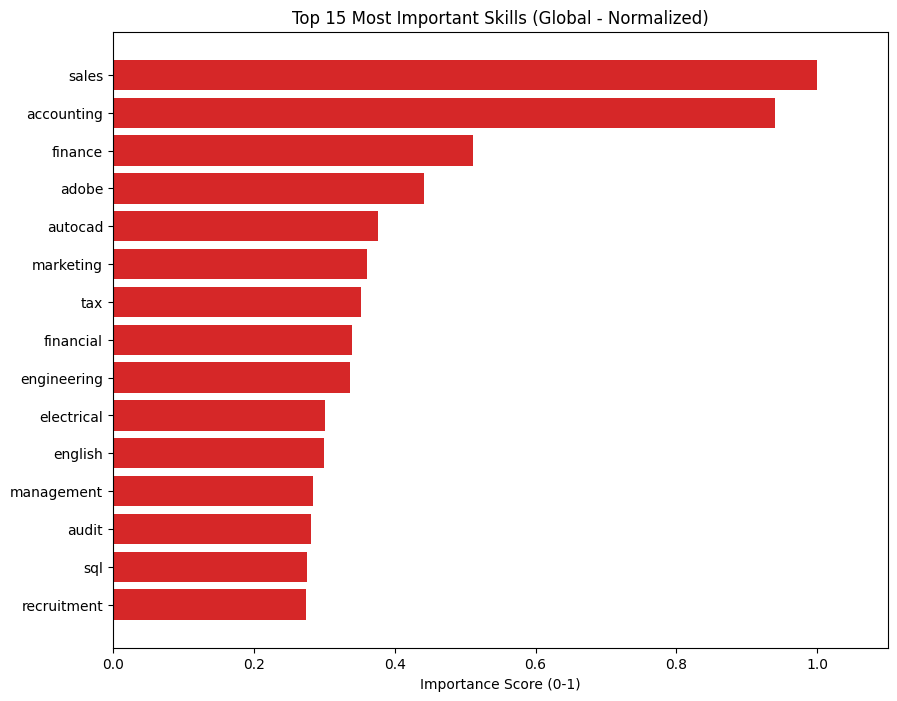

In [54]:
#Ambil Feature Importance dari Model yang baru dilatih
raw_importances = rf.feature_importances_

# Normalisasi (Scaling 0.0 s/d 1.0)
# Skill paling penting akan bernilai 1.0
max_val = raw_importances.max()
normalized_importances = raw_importances / max_val

# Simpan ke Dictionary (Mapping Nama Skill -> Skor)
global_importance_dict = dict(zip(feature_names, normalized_importances))

# Visualisasi Top 15 Skill 
indices = np.argsort(normalized_importances)[-15:]


#buat barplot
plt.figure(figsize=(10, 8))
plt.title('Top 15 Most Important Skills (Global - Normalized)')
plt.barh(range(len(indices)), normalized_importances[indices], color='#d62728', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Importance Score (0-1)')
plt.xlim(0, 1.1) 
plt.show()

Berdasarkan grafik Global Feature Importance di atas, model Random Forest menilai 15 kata/frasa tersebut sebagai fitur yang paling krusial. Beberapa kata mungkin terlihat terlalu umum (seperti "adobe" atau "human"), namun secara statistik, kata-kata ini memiliki Daya Pembeda (Discriminative Power) yang sangat tinggi untuk mengelompokkan Job Function Group.

**Pembuatan Skill Gap Module dengan Harmonic Mean Logic**

Dalam modul rekomendasi skill (Skill Gap Module), sistem tidak menggunakan rata-rata aritmatika biasa untuk memberikan skor rekomendasi. Sebaliknya, kami menerapkan Rerata Harmonis (Harmonic Mean), sebuah pendekatan yang sama dengan perhitungan F1-Score dalam evaluasi klasifikasi.

Skor akhir ($S$) untuk setiap kandidat skill dihitung berdasarkan dua komponen:

1. Relevance ($R$): Seberapa besar "kekosongan" (gap) skill ini pada target pekerjaan yang dituju user? (Dihitung dari selisih vektor TF-IDF).
2. Importance ($I$): Seberapa vital skill ini secara global menurut model Random Forest? (Dihitung dari Feature Importance).

Harmonic Mean Logic

$$Score = \frac{2 \times (Relevance \times Importance)}{Relevance + Importance}$$

Dengan menggunakan Harmonic Mean, sistem menjamin bahwa skill yang direkomendasikan adalah skill yang benar-benar "High Impact" secara global, namun tetap "Contextually Accurate" dengan tujuan karir user.

In [55]:
class SkillGapModule:
    def __init__(self, vectorizer, df_data, global_imp_dict):
        self.vectorizer = vectorizer
        self.feature_names = vectorizer.get_feature_names_out()
        self.global_imp = global_imp_dict
        self.df_data = df_data
        
    def get_target_vector(self, target_group_keyword):
        # Cari Group yang mengandung keyword (Case Insensitive)
        # Target pencarian adalah kolom 'job_function_group'
        mask = self.df_data['job_function_group'].str.contains(target_group_keyword, case=False, na=False)
        matched_df = self.df_data[mask]
        
        if matched_df.empty:
            return None, []
        
        found_groups = matched_df['job_function_group'].unique().tolist()
        
        #Buat Profil Gabungan (Rata-rata skill di group tersebut)
        all_skills_text = matched_df['skills']
        target_vec_matrix = self.vectorizer.transform(all_skills_text)
        
        #Rata-rata vektor (Centroid)
        composite_vector = np.asarray(target_vec_matrix.mean(axis=0)).flatten()
        
        return composite_vector, found_groups

    def analyze(self, user_skills_text, target_group_keyword, top_n=10):
        #Dapatkan Vektor Target Group
        target_vec, found_groups = self.get_target_vector(target_group_keyword)
        
        if target_vec is None:
            print(f"Kategori '{target_group_keyword}' tidak ditemukan.")
            print(f"Available Groups: {self.df_data['job_function_group'].unique()[:5]}...")
            return []
        
        #Info untuk User
        print(f"Menganalisis Gap terhadap Kategori: {found_groups[0]}")
        
        #Hitung Vektor User
        user_vec = self.vectorizer.transform([user_skills_text]).toarray().flatten()
        
        #Hitung Gap (Hanya ambil yang positif/kurang)
        # Target - User
        gap_vec = np.maximum(0, target_vec - user_vec)
        
        # Threshold 0.005 untuk membuang noise kecil
        gap_indices = np.where(gap_vec > 0.005)[0]
        
        if len(gap_indices) == 0:
            print("✅ Tidak ada gap skill yang signifikan! (Perfect Match)")
            return []

        # Scoring Kandidat Skill
        candidates = []
        for idx in gap_indices:
            skill_name = self.feature_names[idx]
            
            # RELEVANCE: Seberapa besar gap skill ini di Group target?
            relevance = gap_vec[idx]
            
            # IMPORTANCE: Seberapa penting skill ini secara global (Model RF)?
            importance = self.global_imp.get(skill_name, 0)
            
            candidates.append({
                'skill': skill_name,
                'relevance': relevance,
                'importance': importance
            })
            
        if not candidates:
            return []
            
        #Normalisasi & Harmonic Mean (Scoring Akhir)
        df_cand = pd.DataFrame(candidates)
        scaler = MinMaxScaler()
        
        #Scale Relevance & Importance agar setara (0-1)
        if len(df_cand) > 1:
            scaled_vals = scaler.fit_transform(df_cand[['relevance', 'importance']])
            df_cand['rel_norm'] = scaled_vals[:, 0]
            df_cand['imp_norm'] = scaled_vals[:, 1]
        else:
            df_cand['rel_norm'] = 1.0
            df_cand['imp_norm'] = 1.0
            
        # Rumus Harmonic Mean (F1-Score Logic)
        # Mengutamakan skill yang Relevance tinggi dan Importance tinggi
        epsilon = 1e-5
        df_cand['final_score'] = 2 * (df_cand['rel_norm'] * df_cand['imp_norm']) / \
                                     (df_cand['rel_norm'] + df_cand['imp_norm'] + epsilon)
        
        # Urutkan dan Ambil Top N
        results = df_cand.sort_values('final_score', ascending=False).head(top_n)
        
        return results[['skill', 'final_score']].to_dict('records')

# Inisialisasi Ulang dengan Data Terbaru
gap_analyzer = SkillGapModule(tfidf, df_clean, global_importance_dict)

# Tuning Model dan Komparasi Model

**Buat Y train baru dengan encoding y** menjadi angka agar dapat diproses oleh model Xgboost dan Lightgbm

Label encoding digunakan karena implementasi library xgboost dan lightgbm di Python menolak One-Hot Encoding untuk target ($y$). Mereka meminta input $y$ berupa array 1 dimensi berisi integer (0, 1, 2...).

Model tidak akan bingung soal peringkat karena yang di encode ialah target (y)

In [56]:
le = LabelEncoder()
y_encoded = le.fit_transform(df_clean['job_function_group'])

# Mapping agar kita tahu 0 itu apa, 1 itu apa
label_mapping = dict(zip(le.transform(le.classes_), le.classes_))
# Ubah Dictionary ke DataFrame
df_mapping = pd.DataFrame(list(label_mapping.items()), columns=['Encoded ID (Angka)', 'Kategori Asli'])

# Urutkan berdasarkan Angka 
df_mapping = df_mapping.sort_values('Encoded ID (Angka)')

# Tampilkan
display(df_mapping)

# X_train_enc  : Fitur untuk model boosting
# y_train_enc  : Target angka (0, 1, 2) untuk model boosting

X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(
    X,              # Fitur tetap sama (TF-IDF)
    y_encoded,      # Target berupa angka
    test_size=0.2, 
    random_state=42, 
    stratify=y_encoded
)

,Encoded ID (Angka),Kategori Asli
0,0,Creative & Media
1,1,Engineering
2,2,Finance & Accounting
3,3,HR & Administration
4,4,IT & Software
5,5,Manufacturing & Operations
6,6,Other
7,7,Sales & Marketing


**Hyperparameter Tuning (Random Forest)**

Menggnakan RandomizedSearchCV untuk mendapatkan parameter mendekati optimal dengan waktu singkat.

In [57]:
#definisi Ruang Parameter
param_dist = {
    'n_estimators': [100, 200, 300],        # Jumlah pohon
    'max_depth': [None, 20, 50, 100],       # Kedalaman pohon (cegah overfitting)
    'min_samples_split': [2, 5, 10],        # Minimal sampel untuk memecah node
    'min_samples_leaf': [1, 2, 4],          # Minimal sampel di daun akhir
    'class_weight': ['balanced', 'balanced_subsample'] # Cara menangani imbalance
}
#deklarasi model basis random forest
rf_base = RandomForestClassifier(random_state=42, n_jobs=-1)

# Mencoba 20 kombinasi acak 
random_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=20,              # Jumlah percobaan
    cv=3,                   # 3-Fold Cross Validation
    verbose=1,
    random_state=42,
    n_jobs=-1,              # Gunakan semua core CPU
    scoring='f1_macro'      # optimalkan Macro Avg (agar adil ke kelas kecil)
)

#fit random search ke train
random_search.fit(X_train, y_train)

#tampilkan parameter terbaik dan skor model terbaik
print(f"\n Parameter Terbaik : {random_search.best_params_}")
print(f" F1 Macro Terbaik: {random_search.best_score_:.4f}")

# Simpan model terbaik
best_rf = random_search.best_estimator_

Fitting 3 folds for each of 20 candidates, totalling 60 fits

 Parameter Terbaik : {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'class_weight': 'balanced_subsample'}
 F1 Macro Terbaik: 0.7119


F1 Macro untuk tuning random forest yaitu 0,7119. Tidak ada kenaikan signifikan dari model random forest sebelum hyperparameter.

**Training Model Xgboost dengan Tuning RandomizedSearchCV**

Model Xgboost dicoba karena model yang robust terhadap imbalance.

In [58]:
# Definisi Ruang Parameter
param_dist_xgb = {
    'max_depth': [3, 5, 7, 10],           # Kedalaman pohon (Biasanya 6 sudah cukup dalam buat XGB)
    'min_child_weight': [1, 3, 5],        # Semakin tinggi, semakin konservatif (cegah overfitting)
    'gamma': [0, 0.1, 0.2, 0.5],          # Minimum loss reduction (Regularization)
    'learning_rate': [0.01, 0.1, 0.2],    # Kecepatan belajar
    'n_estimators': [100, 200]
}

#deklarasi basis model xgboost
xgb_base = XGBClassifier(
    objective='multi:softprob', 
    eval_metric='mlogloss', 
    random_state=42, 
    n_jobs=-1
)
# Jalankan Random Search
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist_xgb,
    n_iter=15,             # Coba 15 kombinasi
    scoring='f1_macro',    # Fokus ke keseimbangan kelas
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)
#fit hasil random search ke dataset training
random_search_xgb.fit(X_train_enc, y_train_enc)
xgb_model = random_search_xgb.best_estimator_
# tampilkan hasil parameter dan f1 macro
print(f" Parameter Terbaik: {random_search_xgb.best_params_}")
print(f"F1 Macro Terbaik : {random_search_xgb.best_score_:.4f}")

Fitting 3 folds for each of 15 candidates, totalling 45 fits
 Parameter Terbaik: {'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0}
F1 Macro Terbaik : 0.6887


F1 Macro berada di angka 0.6887 yang lebih rendah daripada random forest.

**Training Model LightGBM dengan tuning otomatis**

Sama seperti model Xgboost, LightGBM dicoba karena model yang robust terhadap imbalance.

In [59]:
#deklarasi model LightGBM
lgbm_model = LGBMClassifier(
    n_estimators=100,       # Jumlah pohon
    learning_rate=0.1,      # Kecepatan belajar standar
    class_weight='balanced',# <--- KUNCI UTAMA: Otomatis handle imbalance
    random_state=42,
    n_jobs=-1,              # Gunakan semua core CPU
    verbose=-1              # Matikan warning agar output bersih
)

# Train model
lgbm_model.fit(X_train_enc, y_train_enc)

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,'balanced'
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


**Evaluasi dan Komparasi Model**

Buat Fungsi untuk Evaluasi tiap model

In [60]:
# Buat fungsi evaluasi model
def get_comprehensive_metrics(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision (Macro)': precision_score(y_test, y_pred, average='macro', zero_division=0),
        'Recall (Macro)': recall_score(y_test, y_pred, average='macro', zero_division=0),
        'F1-Score (Macro)': f1_score(y_test, y_pred, average='macro', zero_division=0),
        'F1-Score (Weighted)': f1_score(y_test, y_pred, average='weighted', zero_division=0)
    }

Isi dengan model model yang telah dilatih

In [61]:
all_metrics = []

# Random Forest (Pakai y_test String)
# Gunakan rf yang sudah tuning
model_rf_final = best_rf 
all_metrics.append(get_comprehensive_metrics(model_rf_final, X_test, y_test, "Random Forest"))

# LightGBM 
all_metrics.append(get_comprehensive_metrics(lgbm_model, X_test_enc, y_test_enc, "LightGBM"))

# XGBoost 
all_metrics.append(get_comprehensive_metrics(xgb_model, X_test_enc, y_test_enc, "XGBoost"))

c:\Users\ACER\Documents\Dokumen\Data Science Dicoding\Project Capstone\Project\Career-Path-Navigator\navigator-env\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Tampilkan Hasil Evaluasi

In [62]:
# Tampilkan hasil
df_comparison = pd.DataFrame(all_metrics).set_index('Model')

print("Perbandingan Metrik")
# Highlight nilai tertinggi
display(df_comparison)

Perbandingan Metrik


,Accuracy,Precision (Macro),Recall (Macro),F1-Score (Macro),F1-Score (Weighted)
Model,,,,,
Random Forest,0.782686,0.713830,0.699229,0.702439,0.781449
LightGBM,0.770318,0.694123,0.666360,0.678194,0.766317
XGBoost,0.770318,0.701623,0.665470,0.678603,0.764143


Visualisasi Komparasi Model

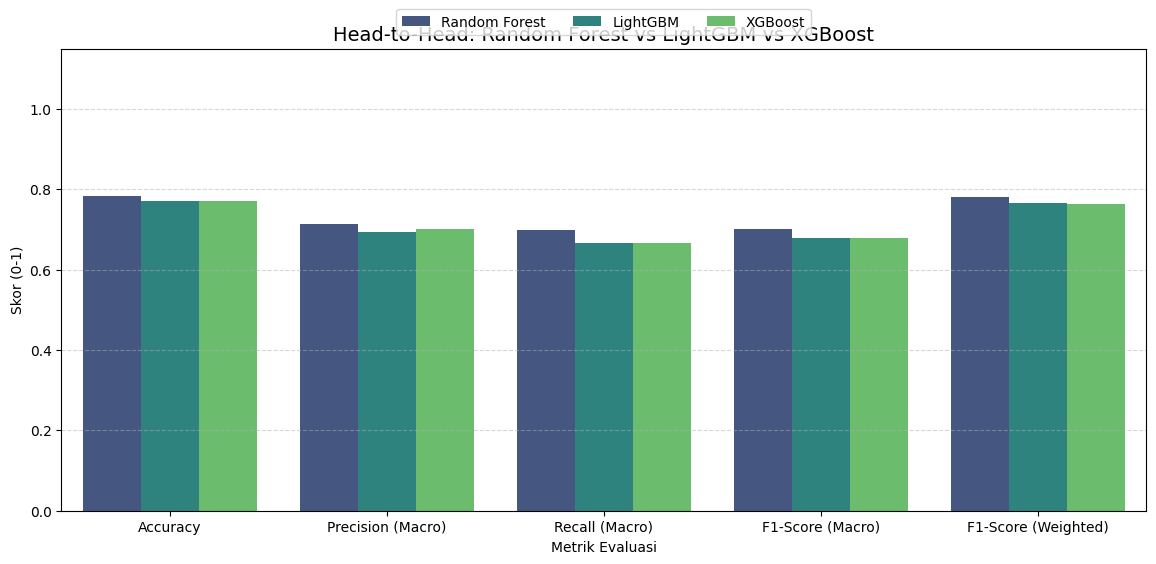

In [63]:
df_plot = df_comparison.reset_index().melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(14, 6))
sns.barplot(data=df_plot, x='Metric', y='Score', hue='Model', palette='viridis')

plt.title('Head-to-Head: Random Forest vs LightGBM vs XGBoost', fontsize=14)
plt.xlabel('Metrik Evaluasi')
plt.ylabel('Skor (0-1)')
plt.ylim(0, 1.15)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Random Forest (RF)  keluar sebagai Juara mengalahkan algoritma boosting modern (XGBoost & LightGBM) di dataset ini.

1. F1-Score Macro (Keadilan):

* Random Forest (0.702) vs XGBoost/LGBM (0.678).

* Selisih ~2.4% ini cukup signifikan di dunia Data Science. Ini artinya Random Forest lebih konsisten dalam mengenali kategori pekerjaan yang jumlah datanya sedikit (minoritas).

2. Recall Macro (Sensitivitas):

* Random Forest (0.699) vs XGBoost (0.665).

* RF lebih baik dalam menemukan lowongan yang tersembunyi.

3. Accuracy (Global):

* RF juga unggul di akurasi total (0.782).

**Kenapa Random Forest Menang?**

Biasanya XGBoost menang di data tabular biasa (Excel). Namun, untuk Data Teks (NLP) dengan TF-IDF, Random Forest seringkali lebih unggul karena:

* High Dimensionality: TF-IDF menghasilkan ribuan fitur. Random Forest sangat efisien memilih acak subset fitur di setiap pohon, sedangkan Boosting kadang "tersesat" mencoba mengoreksi error di dimensi yang begitu luas.

Hitung Importance Menggunakan Feature Importance dari Random Forest

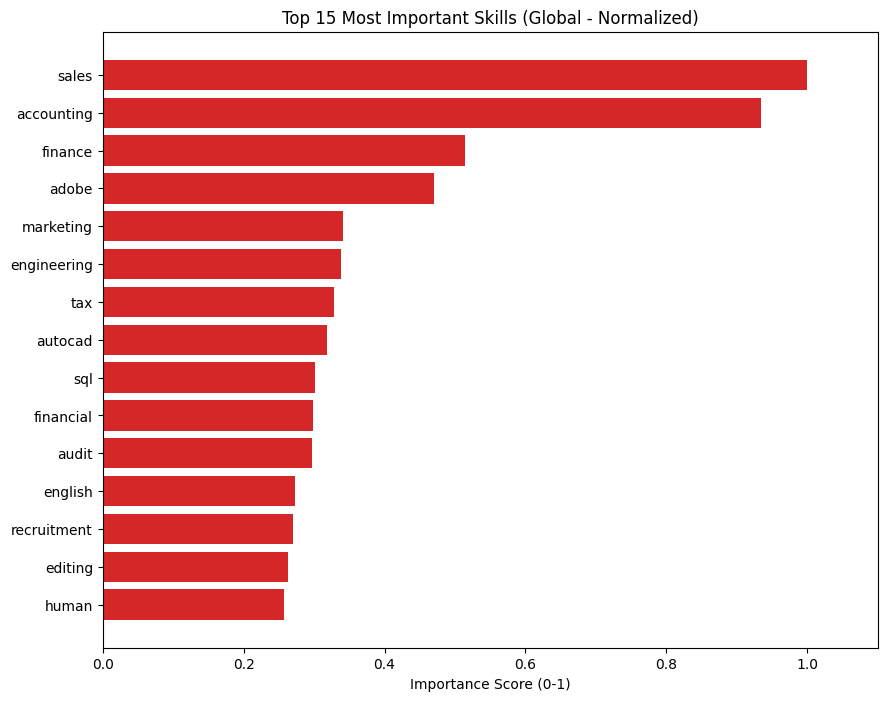

In [64]:
#Ambil Feature Importance dari Model yang baru dilatih
raw_importances = best_rf.feature_importances_

# Normalisasi (Scaling 0.0 s/d 1.0)
# Skill paling penting akan bernilai 1.0
max_val = raw_importances.max()
normalized_importances = raw_importances / max_val

# Simpan ke Dictionary (Mapping Nama Skill -> Skor)
global_importance_dict = dict(zip(feature_names, normalized_importances))

# Visualisasi Top 15 Skill 
indices = np.argsort(normalized_importances)[-15:]


#buat barplot
plt.figure(figsize=(10, 8))
plt.title('Top 15 Most Important Skills (Global - Normalized)')
plt.barh(range(len(indices)), normalized_importances[indices], color='#d62728', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Importance Score (0-1)')
plt.xlim(0, 1.1) 
plt.show()

Berdasarkan grafik Global Feature Importance di atas, model Random Forest menilai 15 kata/frasa tersebut sebagai fitur yang paling krusial. Beberapa kata mungkin terlihat terlalu umum (seperti "adobe" atau "human"), namun secara statistik, kata-kata ini memiliki Daya Pembeda (Discriminative Power) yang sangat tinggi untuk mengelompokkan Job Function Group.

**Pembuatan Skill Gap Module dengan Harmonic Mean Logic**

Dalam modul rekomendasi skill (Skill Gap Module), sistem tidak menggunakan rata-rata aritmatika biasa untuk memberikan skor rekomendasi. Sebaliknya, kami menerapkan Rerata Harmonis (Harmonic Mean), sebuah pendekatan yang sama dengan perhitungan F1-Score dalam evaluasi klasifikasi.

Skor akhir ($S$) untuk setiap kandidat skill dihitung berdasarkan dua komponen:

1. Relevance ($R$): Seberapa besar "kekosongan" (gap) skill ini pada target pekerjaan yang dituju user? (Dihitung dari selisih vektor TF-IDF).
2. Importance ($I$): Seberapa vital skill ini secara global menurut model Random Forest? (Dihitung dari Feature Importance).

Harmonic Mean Logic

$$Score = \frac{2 \times (Relevance \times Importance)}{Relevance + Importance}$$

Dengan menggunakan Harmonic Mean, sistem menjamin bahwa skill yang direkomendasikan adalah skill yang benar-benar "High Impact" secara global, namun tetap "Contextually Accurate" dengan tujuan karir user.

In [65]:
class SkillGapModule:
    def __init__(self, vectorizer, df_data, global_imp_dict):
        self.vectorizer = vectorizer
        self.feature_names = vectorizer.get_feature_names_out()
        self.global_imp = global_imp_dict
        self.df_data = df_data
        
    def get_target_vector(self, target_group_keyword):
        # Cari Group yang mengandung keyword (Case Insensitive)
        # Target pencarian adalah kolom 'job_function_group'
        mask = self.df_data['job_function_group'].str.contains(target_group_keyword, case=False, na=False)
        matched_df = self.df_data[mask]
        
        if matched_df.empty:
            return None, []
        
        found_groups = matched_df['job_function_group'].unique().tolist()
        
        #Buat Profil Gabungan (Rata-rata skill di group tersebut)
        all_skills_text = matched_df['skills']
        target_vec_matrix = self.vectorizer.transform(all_skills_text)
        
        #Rata-rata vektor (Centroid)
        composite_vector = np.asarray(target_vec_matrix.mean(axis=0)).flatten()
        
        return composite_vector, found_groups

    def analyze(self, user_skills_text, target_group_keyword, top_n=10):
        #Dapatkan Vektor Target Group
        target_vec, found_groups = self.get_target_vector(target_group_keyword)
        
        if target_vec is None:
            print(f"Kategori '{target_group_keyword}' tidak ditemukan.")
            print(f"Available Groups: {self.df_data['job_function_group'].unique()[:5]}...")
            return []
        
        #Info untuk User
        print(f"Menganalisis Gap terhadap Kategori: {found_groups[0]}")
        
        #Hitung Vektor User
        user_vec = self.vectorizer.transform([user_skills_text]).toarray().flatten()
        
        #Hitung Gap (Hanya ambil yang positif/kurang)
        # Target - User
        gap_vec = np.maximum(0, target_vec - user_vec)
        
        # Threshold 0.005 untuk membuang noise kecil
        gap_indices = np.where(gap_vec > 0.005)[0]
        
        if len(gap_indices) == 0:
            print("✅ Tidak ada gap skill yang signifikan! (Perfect Match)")
            return []

        # Scoring Kandidat Skill
        candidates = []
        for idx in gap_indices:
            skill_name = self.feature_names[idx]
            
            # RELEVANCE: Seberapa besar gap skill ini di Group target?
            relevance = gap_vec[idx]
            
            # IMPORTANCE: Seberapa penting skill ini secara global (Model RF)?
            importance = self.global_imp.get(skill_name, 0)
            
            candidates.append({
                'skill': skill_name,
                'relevance': relevance,
                'importance': importance
            })
            
        if not candidates:
            return []
            
        #Normalisasi & Harmonic Mean (Scoring Akhir)
        df_cand = pd.DataFrame(candidates)
        scaler = MinMaxScaler()
        
        #Scale Relevance & Importance agar setara (0-1)
        if len(df_cand) > 1:
            scaled_vals = scaler.fit_transform(df_cand[['relevance', 'importance']])
            df_cand['rel_norm'] = scaled_vals[:, 0]
            df_cand['imp_norm'] = scaled_vals[:, 1]
        else:
            df_cand['rel_norm'] = 1.0
            df_cand['imp_norm'] = 1.0
            
        # Rumus Harmonic Mean (F1-Score Logic)
        # Mengutamakan skill yang Relevance tinggi dan Importance tinggi
        epsilon = 1e-5
        df_cand['final_score'] = 2 * (df_cand['rel_norm'] * df_cand['imp_norm']) / \
                                     (df_cand['rel_norm'] + df_cand['imp_norm'] + epsilon)
        
        # Urutkan dan Ambil Top N
        return results[['skill', 'final_score']].to_dict('records')

# Inisialisasi Ulang dengan Data Terbaru
gap_analyzer = SkillGapModule(tfidf, df_clean, global_importance_dict)

# Eksperimen SMOTE (Synthetic Minority Over-sampling Technique) dengan Model Tuned Random Forest

Inisialisasi SMOTE

In [66]:
#k_neighbors=5 adalah standar
smote = SMOTE(random_state=42, k_neighbors=5)

Fit Resample (Hanya ke Data Train, Jangan sentuh Data Test)

In [71]:
X_train_smote, y_train_smote = smote.fit_resample(X_train_enc, y_train_enc)

Tampilkan Distribusi Sampel Baru

In [72]:
print(f"   Shape Baru X_train: {X_train_smote.shape}")
print(f"   Distribusi Kelas Baru (Sekarang seimbang): {Counter(y_train_smote).most_common(5)}")

   Shape Baru X_train: (6472, 2500)
   Distribusi Kelas Baru (Sekarang seimbang): [(np.int64(2), 809), (np.int64(6), 809), (np.int64(7), 809), (np.int64(4), 809), (np.int64(3), 809)]


Training Ulang Random Forest

In [73]:
# Menggunakan parameter terbaik dari tuning sebelumnya
rf_tuned_smote = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=5,
    min_samples_leaf=1,
    max_depth=None,              # Membiarkan pohon tumbuh maksimal
    class_weight='balanced_subsample', # Tetap kita pakai sesuai request
    random_state=42,
    n_jobs=-1
)

# Train pada data yang SUDAH di-SMOTE
rf_tuned_smote.fit(X_train_smote, y_train_smote)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",5
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

Evaluasi dan Komparasi

In [74]:
# Hitung Metrik
metrics_rf_tuned_smote = get_comprehensive_metrics(
    rf_tuned_smote, 
    X_test_enc, 
    y_test_enc, 
    "RF Tuned + SMOTE"
)

# Gabungkan dengan hasil-hasil sebelumnya
# Cek apakah tabel lama (df_comparison) ada
if 'df_comparison' in locals():
    # Ambil index lama reset jadi kolom biasa, lalu concat
    final_comparison = pd.concat([df_comparison.reset_index(), pd.DataFrame([metrics_rf_tuned_smote])], ignore_index=True)
    final_comparison = final_comparison.set_index('Model')
else:
    final_comparison = pd.DataFrame([metrics_rf_tuned_smote]).set_index('Model')

# Urutkan dari F1-Macro Tertinggi ke Terendah 
final_comparison_sorted = final_comparison.sort_values('F1-Score (Macro)', ascending=False)

print("Perbandingan Model :")

# Tampilkan tabel polos (Standard Pandas Display)
display(final_comparison_sorted)

Perbandingan Model :


,Accuracy,Precision (Macro),Recall (Macro),F1-Score (Macro),F1-Score (Weighted)
Model,,,,,
RF Tuned + SMOTE,0.796820,0.738769,0.727959,0.730614,0.793707
Random Forest,0.782686,0.713830,0.699229,0.702439,0.781449
XGBoost,0.770318,0.701623,0.665470,0.678603,0.764143
LightGBM,0.770318,0.694123,0.666360,0.678194,0.766317


Berdasarkan evaluasi, model RF Tuned + SMOTE yang paling baik.

# Feature Importance dan Skill Gap Module

Hitung Importance Menggunakan Feature Importance dari Random Forest

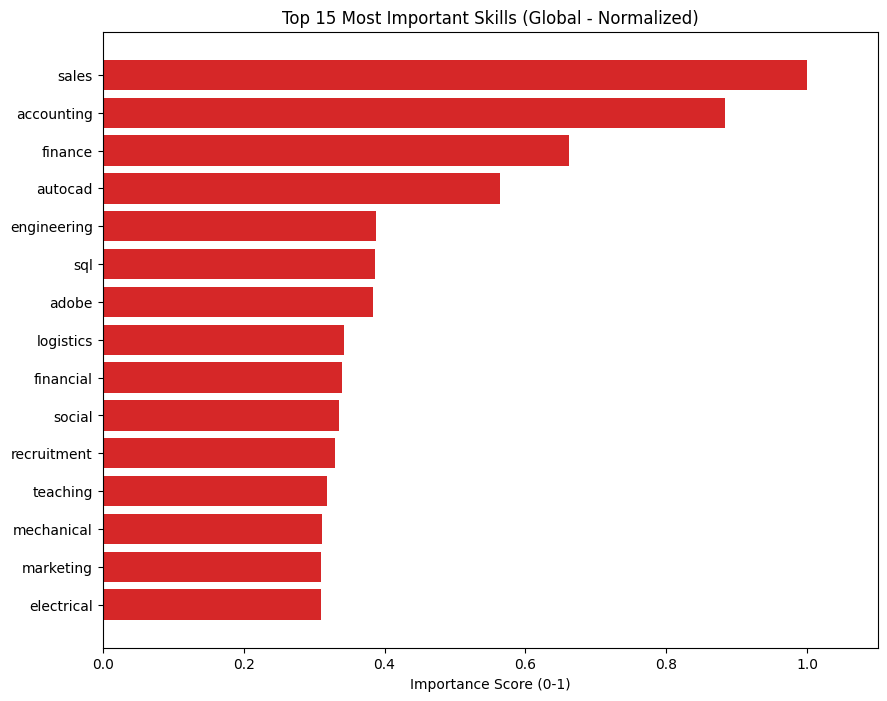

In [75]:
#Ambil Feature Importance dari Model yang baru dilatih
raw_importances = rf_tuned_smote.feature_importances_

# Normalisasi (Scaling 0.0 s/d 1.0)
# Skill paling penting akan bernilai 1.0
max_val = raw_importances.max()
normalized_importances = raw_importances / max_val

# Simpan ke Dictionary (Mapping Nama Skill -> Skor)
global_importance_dict = dict(zip(feature_names, normalized_importances))

# Visualisasi Top 15 Skill 
indices = np.argsort(normalized_importances)[-15:]


#buat barplot
plt.figure(figsize=(10, 8))
plt.title('Top 15 Most Important Skills (Global - Normalized)')
plt.barh(range(len(indices)), normalized_importances[indices], color='#d62728', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Importance Score (0-1)')
plt.xlim(0, 1.1) 
plt.show()

Berdasarkan grafik Global Feature Importance di atas, model Random Forest menilai 15 kata/frasa tersebut sebagai fitur yang paling krusial. Beberapa kata mungkin terlihat terlalu umum (seperti "adobe" atau "human"), namun secara statistik, kata-kata ini memiliki Daya Pembeda (Discriminative Power) yang sangat tinggi untuk mengelompokkan Job Function Group.

**Pembuatan Skill Gap Module dengan Harmonic Mean Logic**

Dalam modul rekomendasi skill (Skill Gap Module), sistem tidak menggunakan rata-rata aritmatika biasa untuk memberikan skor rekomendasi. Sebaliknya, kami menerapkan Rerata Harmonis (Harmonic Mean), sebuah pendekatan yang sama dengan perhitungan F1-Score dalam evaluasi klasifikasi.

Skor akhir ($S$) untuk setiap kandidat skill dihitung berdasarkan dua komponen:

1. Relevance ($R$): Seberapa besar "kekosongan" (gap) skill ini pada target pekerjaan yang dituju user? (Dihitung dari selisih vektor TF-IDF).
2. Importance ($I$): Seberapa vital skill ini secara global menurut model Random Forest? (Dihitung dari Feature Importance).

Harmonic Mean Logic

$$Score = \frac{2 \times (Relevance \times Importance)}{Relevance + Importance}$$

Dengan menggunakan Harmonic Mean, sistem menjamin bahwa skill yang direkomendasikan adalah skill yang benar-benar "High Impact" secara global, namun tetap "Contextually Accurate" dengan tujuan karir user.

In [80]:
class SkillGapModule:
    def __init__(self, vectorizer, df_data, global_imp_dict):
        self.vectorizer = vectorizer
        self.feature_names = vectorizer.get_feature_names_out()
        self.global_imp = global_imp_dict
        self.df_data = df_data
        
    def get_target_vector(self, target_group_keyword):
        # Cari Group yang mengandung keyword
        mask = self.df_data['job_function_group'].str.contains(target_group_keyword, case=False, na=False)
        matched_df = self.df_data[mask]
        
        if matched_df.empty:
            return None, []
        
        found_groups = matched_df['job_function_group'].unique().tolist()
        
        # Buat Profil Gabungan (Centroid)
        all_skills_text = matched_df['skills']
        target_vec_matrix = self.vectorizer.transform(all_skills_text)
        composite_vector = np.asarray(target_vec_matrix.mean(axis=0)).flatten()
        
        return composite_vector, found_groups

    def analyze(self, user_skills_text, target_group_keyword, top_n=10):
        # Dapatkan Vektor Target
        target_vec, found_groups = self.get_target_vector(target_group_keyword)
        
        if target_vec is None:
            return []
        
        # Hitung Vektor User
        user_vec = self.vectorizer.transform([user_skills_text]).toarray().flatten()
        
        # Hitung Gap (Target - User) -> Ambil yang positif saja
        gap_vec = np.maximum(0, target_vec - user_vec)
        
        # Threshold filter noise
        gap_indices = np.where(gap_vec > 0.005)[0]
        
        if len(gap_indices) == 0:
            return []

        # Scoring Kandidat
        candidates = []
        for idx in gap_indices:
            skill_name = self.feature_names[idx]
            relevance = gap_vec[idx]
            importance = self.global_imp.get(skill_name, 0)
            
            candidates.append({
                'skill': skill_name,
                'relevance': relevance,
                'importance': importance
            })
            
        if not candidates:
            return []
            
        # Normalisasi & Harmonic Mean
        df_cand = pd.DataFrame(candidates)
        scaler = MinMaxScaler()
        
        if len(df_cand) > 1:
            scaled_vals = scaler.fit_transform(df_cand[['relevance', 'importance']])
            df_cand['rel_norm'] = scaled_vals[:, 0]
            df_cand['imp_norm'] = scaled_vals[:, 1]
        else:
            df_cand['rel_norm'] = 1.0
            df_cand['imp_norm'] = 1.0
            
        epsilon = 1e-5
        # Rumus F1-like score
        df_cand['final_score'] = 2 * (df_cand['rel_norm'] * df_cand['imp_norm']) / \
                                     (df_cand['rel_norm'] + df_cand['imp_norm'] + epsilon)
        
        # Definisikan variabel 'results' dengan mengambil Top N score tertinggi
        results = df_cand.sort_values('final_score', ascending=False).head(top_n)
        
        # Kembalikan hasil
        return results[['skill', 'final_score']].to_dict('records')

# Inisialisasi Ulang Module
gap_analyzer = SkillGapModule(tfidf, df_clean, global_importance_dict)

# Tes Inferensi untuk Pengecekan Business Metrics

Tes ini digunakan untuk menentukan layak atau tidak model dalam dunia bisnis atau menghadapi data baru.

**Integrasi: Prediksi Karir + Skill Gap**

Buat Fungsi Sistem Rekomenasi

In [81]:
def career_advisor_system(user_cv_text):
    print("Career Path Navigator")
    
    # Transform input
    X_new = tfidf.transform([user_cv_text])
    
    # Prediksi menggunakan model terbaik (RF Tuned SMOTE)
    pred_label = rf_tuned_smote.predict(X_new)[0]
    
    # Jika output angka, decode balik ke string
    if isinstance(pred_label, (int, np.integer)):
        if 'le' in locals():
            pred_label_str = le.inverse_transform([pred_label])[0]
        else:
            pred_label_str = str(pred_label)
    else:
        pred_label_str = pred_label
        
    print(f"Input User: \"{user_cv_text[:60]}...\"")
    print(f"Rekomendasi Karir: {pred_label_str.upper()}")
    
    # Skill Gap Analysis
    recommendations = gap_analyzer.analyze(user_cv_text, pred_label_str, top_n=7)
    
    if not recommendations:
        print(" Profil Anda sudah sangat sesuai! Tidak ada gap signifikan.")
    else:
        print(f" Saran Pengembangan Diri untuk posisi {pred_label_str}:")
        for i, rec in enumerate(recommendations, 1):
            score = rec['final_score']
            # Tampilkan bar loading sederhana
            bar_len = int(score * 10)
            bar = "█" * bar_len + "░" * (10 - bar_len)
            
            print(f"   {i}. {rec['skill'].ljust(15)} [{bar}] (Prioritas: {score:.2f})")

Tes dengan data dummy

In [82]:
# Kasus 1 : Lulusan Baru yang ingin jadi Data Analyst 
cv_1 = """
Saya adalah lulusan baru jurusan Matematika yang memiliki ketertarikan tinggi pada angka. 
Selama kuliah, saya sering menggunakan Microsoft Excel untuk mengolah data statistik 
dan membuat Pivot Table. Saya juga memiliki pemahaman dasar tentang bahasa pemrograman Python 
khususnya library Pandas untuk manipulasi data sederhana. Saya orang yang teliti, 
suka memecahkan masalah logis, dan ingin berkarir di bidang pengolahan data.
"""

# Kasus 2 : Sales Konvensional yang ingin upgrade karir 
cv_2 = """
Saya memiliki pengalaman 3 tahun bekerja sebagai sales lapangan di industri retail. 
Keahlian utama saya adalah kemampuan komunikasi yang persuasif, negosiasi dengan klien, 
dan membangun hubungan baik (relationship building). Saya terbiasa bekerja dengan target 
penjualan bulanan dan selalu mencapainya. Saya senang bertemu orang baru dan percaya diri 
dalam melakukan presentasi produk secara tatap muka.
"""

In [85]:
def career_advisor_system(user_cv_text, label_encoder):
    print("="*65)
    print("Career Path Navigator")
    print("="*65)
    
    # Prediksi Job Function
    # Transform input menggunakan global 'tfidf'
    X_new = tfidf.transform([user_cv_text])
    
    # Prediksi menggunakan model global 'rf_tuned_smote'
    # Hasilnya pasti ANGKA (misal: 0, 1, 2...)
    pred_idx = rf_tuned_smote.predict(X_new)[0]
    
    # decoding label encoder
    try:
        pred_label_str = label_encoder.inverse_transform([pred_idx])[0]
    except Exception as e:
        print(f"❌ Error Decoding: {e}")
        print("Pastikan variabel 'le' (LabelEncoder) sudah di-fit sebelumnya.")
        return

    print(f"📄 Input User: \"{user_cv_text[:80]}...\"")
    print("-" * 65)
    
    # Tampilkan Label yang sudah berupa TEKS
    print(f"🎯 Rekomendasi Fungsi Pekerjaan: 👉 {pred_label_str.upper()} 👈")
    
    # Tampilkan contoh Job Title (Sekarang pasti berhasil karena labelnya Teks)
    sample_titles = df_clean[df_clean['job_function_group'] == pred_label_str]['job_title'].unique()
    
    if len(sample_titles) > 3:
        examples = random.sample(list(sample_titles), 3)
    else:
        examples = list(sample_titles)
        
    print(f"   (Contoh Jabatan: {', '.join(examples)}, dll.)")
    
    # Skill Gap analysis
    print("\n Menganalisis Skill Gap ")
    
    # Kirim label TEKS ke gap analyzer
    recommendations = gap_analyzer.analyze(user_cv_text, pred_label_str, top_n=7)
    
    if not recommendations:
        print("   ✅ Profil Anda kompetitif untuk fungsi ini! Tidak ada gap mayor.")
    else:
        print(f"   ⚠️  Saran Skill untuk masuk ke fungsi {pred_label_str}:")
        for i, rec in enumerate(recommendations, 1):
            score = rec['final_score']
            bar_len = int(score * 10)
            # Clip bar length agar tidak error jika score > 1
            bar_len = max(0, min(10, bar_len))
            bar = "█" * bar_len + "░" * (10 - bar_len)
            print(f"   {i}. {rec['skill'].ljust(15)} [{bar}] (Urgency: {score:.2f})")
            
    print("="*65) 
print("Simulasi CV 1 (Data):")
career_advisor_system(cv_1, le)

print("\nSimulasi CV 2 (Sales):")
career_advisor_system(cv_2, le)

Simulasi CV 1 (Data):
Career Path Navigator
📄 Input User: "
Saya adalah lulusan baru jurusan Matematika yang memiliki ketertarikan tinggi p..."
-----------------------------------------------------------------
🎯 Rekomendasi Fungsi Pekerjaan: 👉 FINANCE & ACCOUNTING 👈
   (Contoh Jabatan: Corporate Planning Coordinator, Finance & Accounting Manager, Investment Manager, dll.)

 Menganalisis Skill Gap 
   ⚠️  Saran Skill untuk masuk ke fungsi Finance & Accounting:
   1. accounting      [█████████░] (Urgency: 0.94)
   2. finance         [█████░░░░░] (Urgency: 0.53)
   3. tax             [███░░░░░░░] (Urgency: 0.36)
   4. financial       [███░░░░░░░] (Urgency: 0.35)
   5. audit           [███░░░░░░░] (Urgency: 0.30)
   6. bank            [██░░░░░░░░] (Urgency: 0.29)
   7. cash            [██░░░░░░░░] (Urgency: 0.21)

Simulasi CV 2 (Sales):
Career Path Navigator
📄 Input User: "
Saya memiliki pengalaman 3 tahun bekerja sebagai sales lapangan di industri ret..."
---------------------------------

Kasus pertama masih miss, maka kita coba dengan bahasa inggris

Coba pakai bahasa inggris

In [87]:
# Kasus 1: Kita perkuat nuansa "Data"-nya agar tidak lari ke Finance
# Tambahkan keyword: 'Programming', 'Database', 'Modeling'
cv_1_eng = """
I am a Mathematics graduate with a strong interest in data. 
I am proficient in Excel and Pivot Tables. 
I have intermediate skills in Python programming, specifically using Pandas for data manipulation. 
I enjoy problem-solving and logic.
"""

# Kasus 2: Sales 
# Kita lihat apakah 'communication' akan hilang dari saran (karena sudah disebut)
cv_2_eng = """
I have 3 years of experience in field sales. 
My core skills are persuasive communication, negotiation, and relationship building. 
I am used to working with monthly sales targets.
"""

print("🇬🇧 SIMULASI ENGLISH INPUT (Mengatasi Isu Bahasa)")
print("-" * 60)

print("\n1️⃣ CASE 1 (Math/Data):")
career_advisor_system(cv_1_eng, le)

print("\n2️⃣ CASE 2 (Sales):")
career_advisor_system(cv_2_eng, le)

🇬🇧 SIMULASI ENGLISH INPUT (Mengatasi Isu Bahasa)
------------------------------------------------------------

1️⃣ CASE 1 (Math/Data):
Career Path Navigator
📄 Input User: "
I am a Mathematics graduate with a strong interest in data. 
I am proficient in..."
-----------------------------------------------------------------
🎯 Rekomendasi Fungsi Pekerjaan: 👉 IT & SOFTWARE 👈
   (Contoh Jabatan: QT SOFWARE ENGINEER, IT Networking Supervisor, IT Infrastructure, dll.)

 Menganalisis Skill Gap 
   ⚠️  Saran Skill untuk masuk ke fungsi IT & Software:
   1. sql             [█████████░] (Urgency: 0.92)
   2. science         [██████░░░░] (Urgency: 0.70)
   3. software        [██████░░░░] (Urgency: 0.67)
   4. computer        [██████░░░░] (Urgency: 0.67)
   5. server          [██████░░░░] (Urgency: 0.67)
   6. computer science [██████░░░░] (Urgency: 0.66)
   7. web             [██████░░░░] (Urgency: 0.63)

2️⃣ CASE 2 (Sales):
Career Path Navigator
📄 Input User: "
I have 3 years of experience in fiel

Pilih kasus lain

In [89]:
# Kasus 3: Perawat (Clinical)
# Keyword: Nursing, Patient Care, Vital Signs, Hospital
# Gap Potential: ICU, Surgery, Pediatrics, Emergency, BLS/ACLS (Sertifikasi)
cv_healthcare_1 = """
I am a Registered Nurse with 2 years of experience in a general hospital ward. 
My expertise includes patient care, monitoring vital signs, and administering medication. 
I am compassionate, communicative, and able to work under pressure in emergency situations.
"""

# Kasus 4: Farmasi/Laboratorium (Pharmaceutical)
# Keyword: Pharmacy, Biology, Chemicals, Lab
# Gap Potential: Clinical Research, Regulatory, QA/QC, Sales (Medical Rep)
cv_healthcare_2 = """
I hold a Bachelor's degree in Pharmacy. I have experience working in a retail pharmacy, 
handling prescriptions and managing drug inventory. I have strong knowledge of pharmacology 
and basic laboratory skills. I am detail-oriented and interested in the pharmaceutical industry.
"""

print("🏥 SIMULASI HEALTHCARE DOMAIN")
print("-" * 60)

print("\n3️⃣ CASE 3 (Nurse/Clinical):")
career_advisor_system(cv_healthcare_1, le)

print("\n4️⃣ CASE 4 (Pharmacist/Science):")
career_advisor_system(cv_healthcare_2, le)

🏥 SIMULASI HEALTHCARE DOMAIN
------------------------------------------------------------

3️⃣ CASE 3 (Nurse/Clinical):
Career Path Navigator
📄 Input User: "
I am a Registered Nurse with 2 years of experience in a general hospital ward. ..."
-----------------------------------------------------------------
🎯 Rekomendasi Fungsi Pekerjaan: 👉 OTHER 👈
   (Contoh Jabatan: GM Operational, Customer Service, Property Advisor - Tritan Point/ Tritan Hub warehouse, dll.)

 Menganalisis Skill Gap 
   ⚠️  Saran Skill untuk masuk ke fungsi Other:
   1. sales           [███████░░░] (Urgency: 0.77)
   2. autocad         [████░░░░░░] (Urgency: 0.49)
   3. teaching        [████░░░░░░] (Urgency: 0.46)
   4. creative        [███░░░░░░░] (Urgency: 0.33)
   5. english         [███░░░░░░░] (Urgency: 0.32)
   6. design          [██░░░░░░░░] (Urgency: 0.29)
   7. management      [██░░░░░░░░] (Urgency: 0.29)

4️⃣ CASE 4 (Pharmacist/Science):
Career Path Navigator
📄 Input User: "
I hold a Bachelor's degree in Ph

Karena model terbukti "English-Centric" (karena dataset latihnya bahasa Inggris), Anda memiliki 2 opsi strategi untuk aplikasi nanti:

1. Opsi A: Paksa User Input Bahasa Inggris (Mudah)
Anda memberi notifikasi di UI: "Please input your CV/Resume in English for best results."

2. Opsi B: Fitur Auto-Translation (Nilai Plus/Advanced) ⭐
Biarkan user input Bahasa Indonesia (agar UX bagus), tapi di belakang layar (backend), sistem menerjemahkannya ke Inggris sebelum disuapi ke model.

Skenario & Solusi
Skenario A: Tidak ada kategori "Healthcare" / "Medical" di daftar.

Artinya: Dataset Anda memang dataset "Corporate/Office Jobs" (fokus orang kantor).

Solusi Laporan: Tulis di bagian Limitation: "Model ini dikhususkan untuk pekerjaan korporat (IT, Finance, Sales) dan belum mencakup sektor spesialis seperti Medis atau Konstruksi Berat." Ini bukan error, tapi scope project.

Skenario B: Ada kategori "Healthcare", tapi jumlah datanya sangat sedikit (misal < 50).

Artinya: Model mengalami Class Imbalance parah. Meskipun sudah di-SMOTE, fitur/keyword unik medis (seperti patient, diagnosis, drug) mungkin kalah dominan dibanding keyword umum.

Solusi: Terima hasil ini sebagai insight bahwa SMOTE membantu angka, tapi tidak selalu memperbaiki pemahaman konteks jika data aslinya terlalu sedikit.

Apa yang harus dilakukan sekarang?
Jangan ubah modelnya (karena IT & Sales sudah bagus). Gunakan temuan ini untuk mempertajam Scope Aplikasi Anda.

Ubah narasi aplikasi Anda menjadi:

"Career Path Navigator: Spesialis Karir Korporat & Digital"

Jadi, wajar jika Perawat atau Koki tidak terdeteksi dengan baik, karena fokus aplikasi adalah pekerjaan kerah putih (White Collar Jobs).